<div class="alert alert-block alert-success">
    <b><center>LINEAR REGRESSION</center></b>
    <b><center>Tensorflow 2를 이용한 코드 예제</center></b>
</div>

# Configure Environment

In [2]:
# !pip install git+https://github.com/nockchun/rspy --force
# import rspy as rsp
rsp.setSystemWarning(off=True)

NameError: name 'rsp' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [4]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.6.0'

# Prepare Data

>* total_bill : 전체 음식 가격 (US dollars)
>* tip        : 팁 금액 (US dollars)
>* sex        : 성별 (0=male, 1=female)
>* smoker     : 흡연 여부 (0=No, 1=Yes)
>* day        : 요일 (3=Thur, 4=Fri, 5=Sat, 6=Sun)
>* time       : 시간대 (0=Lunch, 1=Dinner)
>* size       : 동행자 수

In [5]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [6]:
# tips.replace({ "sex": {"Male": 0, "Female": 1}, "smoker": {"No": 0, "Yes": 1} }, inplace=True)
# tips.head(3)

In [7]:
# def scale(data):
#     return data.total_bill/(data.size+1)

In [8]:
# tips["tendency"] = tips[["total_bill", "size"]].apply(scale, axis=1)

In [9]:
# tips.head()

In [10]:
data = tips[["total_bill", "size"]].values
label = tips[["tip"]].values

# Analysis Datas

In [11]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## Generate Model

In [12]:
model = models.Sequential([
    layers.Input([2]),
    layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


2022-04-11 01:38:04.787570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 01:38:04.795483: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 01:38:04.795737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-11 01:38:04.796984: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

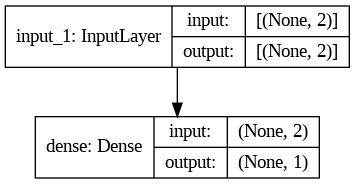

In [13]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [14]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.SGD(1e-5)
)

## Training

In [15]:
history = model.fit(
    data, label, epochs=50
)

2022-04-11 01:38:08.477993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
8/8 [==============================] - 0s 1ms/step - loss: 769.3016
Epoch 2/50
8/8 [==============================] - 0s 933us/step - loss: 657.5964
Epoch 3/50
8/8 [==============================] - 0s 869us/step - loss: 564.3725
Epoch 4/50
8/8 [==============================] - 0s 882us/step - loss: 484.1314
Epoch 5/50
8/8 [==============================] - 0s 879us/step - loss: 415.3416
Epoch 6/50
8/8 [==============================] - 0s 882us/step - loss: 357.0910
Epoch 7/50
8/8 [==============================] - 0s 842us/step - loss: 306.2531
Epoch 8/50
8/8 [==============================] - 0s 850us/step - loss: 263.2169
Epoch 9/50
8/8 [==============================] - 0s 866us/step - loss: 226.1897
Epoch 10/50
8/8 [==============================] - 0s 853us/step - loss: 194.6016
Epoch 11/50
8/8 [==============================] - 0s 809us/step - loss: 167.0591
Epoch 12/50
8/8 [==============================] - 0s 882us/step - loss: 143.5503
Epoch 13/50
8/8 [==========

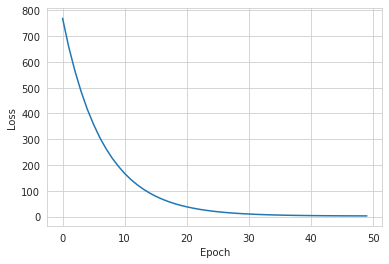

In [16]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()

## Predict

In [23]:
errors = []
for itemData, itemLabel in zip(data, label):
    predicted = model.predict([itemData.tolist()])
    tip = itemLabel.item()
    tipPred = predicted.item()
    errors.append(tip - tipPred)

In [24]:
np.average(np.abs(errors))

1.092623234361899

In [26]:
# errors